<b style="font-size:17px">You have a dataset about whether or not someone got in an accident that year. This insurance company needs to understand which features of a person or vehicle make them more likely to get in an accident.
Clean missing values first, but no exploratory info is needed. You need to predict the Outcome column.</b>

<b style="font-size:15px">1. Clean the dataset and discuss how you cleaned each variable with missing values and why you chose that method.</b>

<b style="font-size:15px">Data Cleaning</b>

In [1]:
#importing the required libraries and loading car-insurance dataset


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
import scipy.stats as stats
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Ignore all warnings
warnings.filterwarnings('ignore')


#loading the dataset
carinsur_df = pd.read_csv("/Users/sudhamshuvidyananda/Documents/Predictive Analytics ALY 6020/FInal Exam/car_insurance.csv")
carinsur_df



/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,0-9y,high school,upper class,0.629027,1,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,0-9y,none,poverty,0.357757,0,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,0-9y,high school,working class,0.493146,1,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,0-9y,university,working class,0.206013,1,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,10-19y,none,working class,0.388366,1,0,0,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,10-19y,university,upper class,0.582787,1,0,0,10238,16000.0,sedan,0,0,1,0
9996,910346,26-39,female,10-19y,none,middle class,0.522231,1,0,1,32765,NaN,sedan,1,0,0,0
9997,468409,26-39,male,0-9y,high school,middle class,0.470940,1,0,1,10238,14000.0,sedan,0,0,0,0
9998,903459,26-39,female,10-19y,high school,poverty,0.364185,0,0,1,10238,13000.0,sedan,2,0,1,1


In [2]:
carinsur_df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [3]:
carinsur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   MARRIED              10000 non-null  int64  
 9   CHILDREN             10000 non-null  int64  
 10  POSTAL_CODE          10000 non-null  int64  
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  object 
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [4]:
#Data cleaning
#checking for null values
carinsur_df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [5]:
# finding all the missing data and summing them based on each column and storing it in a dataset
totl = carinsur_df.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by diving the number of missing values with total and  storing it in a dataframe
percent = (carinsur_df.isnull().sum()/ carinsur_df.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above datasets
carinsur_missing_dt  = pd.concat([totl, percent], axis=1, keys=['Total', 'Percentage'])
# Printing the dataset
carinsur_missing_dt 

,Total,Percentage
CREDIT_SCORE,982,9.82
ANNUAL_MILEAGE,957,9.57
ID,0,0.00
CHILDREN,0,0.00
PAST_ACCIDENTS,0,0.00
DUIS,0,0.00
SPEEDING_VIOLATIONS,0,0.00
VEHICLE_TYPE,0,0.00
POSTAL_CODE,0,0.00
MARRIED,0,0.00


In [6]:
#replacing null/missing value with the median for the columns CREDIT_SCORE and ANNUAL_MILEAGE

carinsur_df['CREDIT_SCORE']=carinsur_df['CREDIT_SCORE'].fillna(carinsur_df['CREDIT_SCORE'].median(),axis=0)
carinsur_df['ANNUAL_MILEAGE']=carinsur_df['ANNUAL_MILEAGE'].fillna(carinsur_df['ANNUAL_MILEAGE'].median(),axis=0)


carinsur_df

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,0-9y,high school,upper class,0.629027,1,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,0-9y,none,poverty,0.357757,0,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,0-9y,high school,working class,0.493146,1,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,0-9y,university,working class,0.206013,1,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,10-19y,none,working class,0.388366,1,0,0,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,10-19y,university,upper class,0.582787,1,0,0,10238,16000.0,sedan,0,0,1,0
9996,910346,26-39,female,10-19y,none,middle class,0.522231,1,0,1,32765,12000.0,sedan,1,0,0,0
9997,468409,26-39,male,0-9y,high school,middle class,0.470940,1,0,1,10238,14000.0,sedan,0,0,0,0
9998,903459,26-39,female,10-19y,high school,poverty,0.364185,0,0,1,10238,13000.0,sedan,2,0,1,1


In [7]:
#re-checking the dataset for null values
carinsur_df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [8]:
#checking for special characters

carinsur_df.isin(['!@#$%^&*(),.?":{}|<>']).sum(axis=0)

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [9]:
#checking for duplicates

if carinsur_df.duplicated().any():
    print("There are duplicates")
else:
    print("No duplicates found")

No duplicates found


In [10]:
#checking for outliers

# Define a function to detect outliers using IQR
def detect_outliers(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
    return outliers

# Numeric columns to check for outliers
numeric_columns = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS','VEHICLE_OWNERSHIP',
                  'MARRIED','CHILDREN','POSTAL_CODE','OUTCOME']

outliers_data = {}

# Detect outliers for each numeric column
for column in numeric_columns:
    outliers = detect_outliers(carinsur_df, column)
    outliers_data[column] = len(outliers)

outliers_data


{'CREDIT_SCORE': 57,
 'ANNUAL_MILEAGE': 273,
 'SPEEDING_VIOLATIONS': 588,
 'DUIS': 1882,
 'PAST_ACCIDENTS': 285,
 'VEHICLE_OWNERSHIP': 0,
 'MARRIED': 0,
 'CHILDREN': 0,
 'POSTAL_CODE': 484,
 'OUTCOME': 0}

In [11]:
#cleaning the outliers

# Define a function to cap outliers using IQR
def cap_outliers(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    dataframe[column_name] = dataframe[column_name].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return dataframe

# Cap outliers for CREDIT_SCORE, ANNUAL_MILEAGE and POSTAL_CODE
carinsur_df = cap_outliers(carinsur_df, 'CREDIT_SCORE')
carinsur_df = cap_outliers(carinsur_df, 'ANNUAL_MILEAGE')
carinsur_df = cap_outliers(carinsur_df, 'POSTAL_CODE')

# Check the data after capping
carinsur_df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.516849,0.697000,0.498200,0.688800,18628.146200,11718.950000,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.130275,0.459578,0.500022,0.463008,14464.259248,2610.003278,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.167364,0.000000,0.000000,0.000000,10238.000000,5500.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.871752,1.000000,1.000000,1.000000,66555.500000,17500.000000,22.000000,6.00000,15.000000,1.000000


<b style="font-size:15px">Exploratory Data Analysis</b>

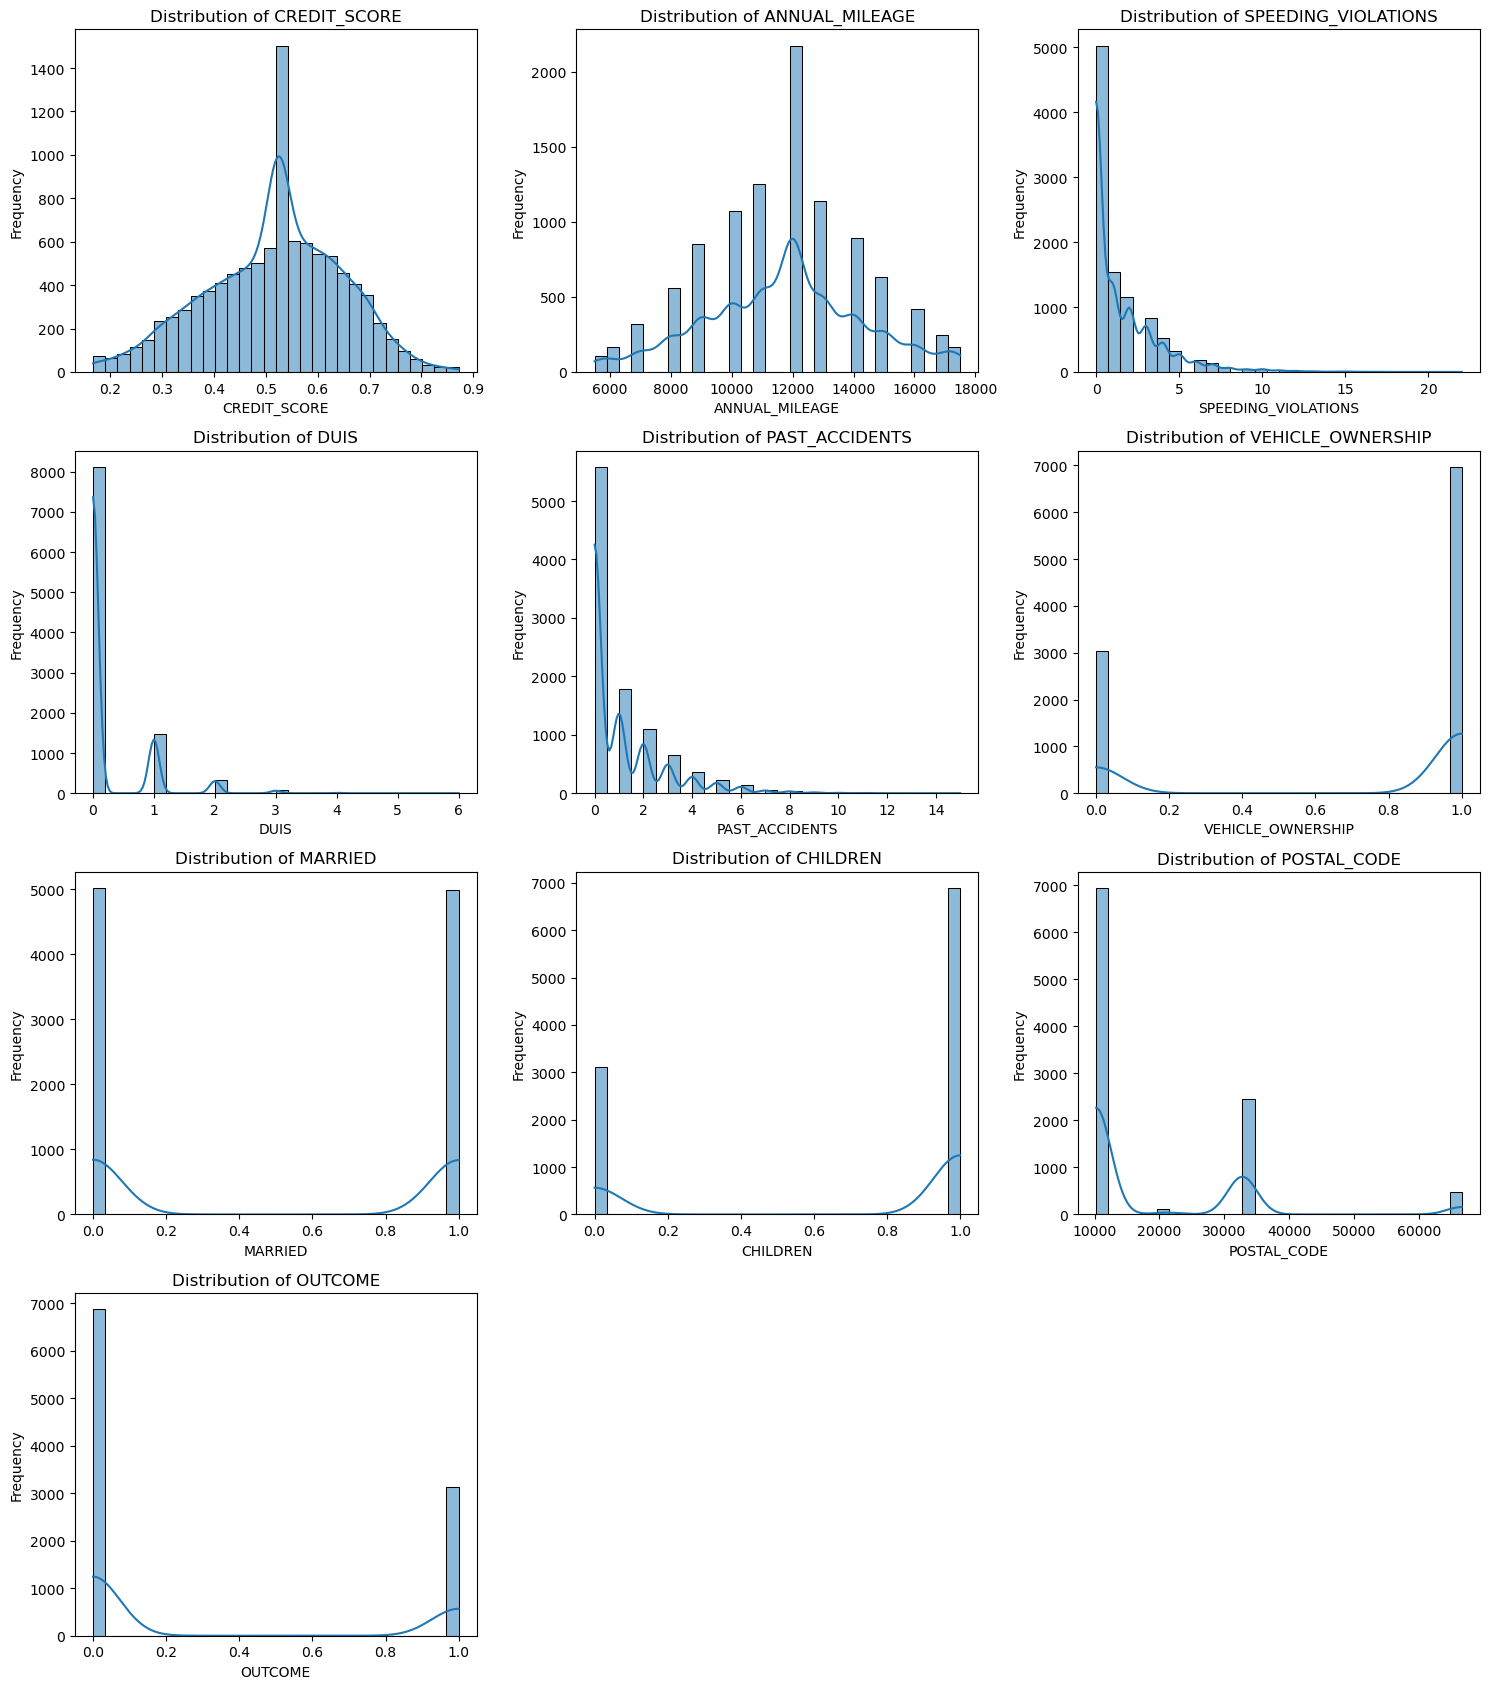

In [12]:
# Distribution plot for numeric columns

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 17))

# Numeric columns for visualization
num_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS','VEHICLE_OWNERSHIP',
               'MARRIED','CHILDREN','POSTAL_CODE','OUTCOME']

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(carinsur_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


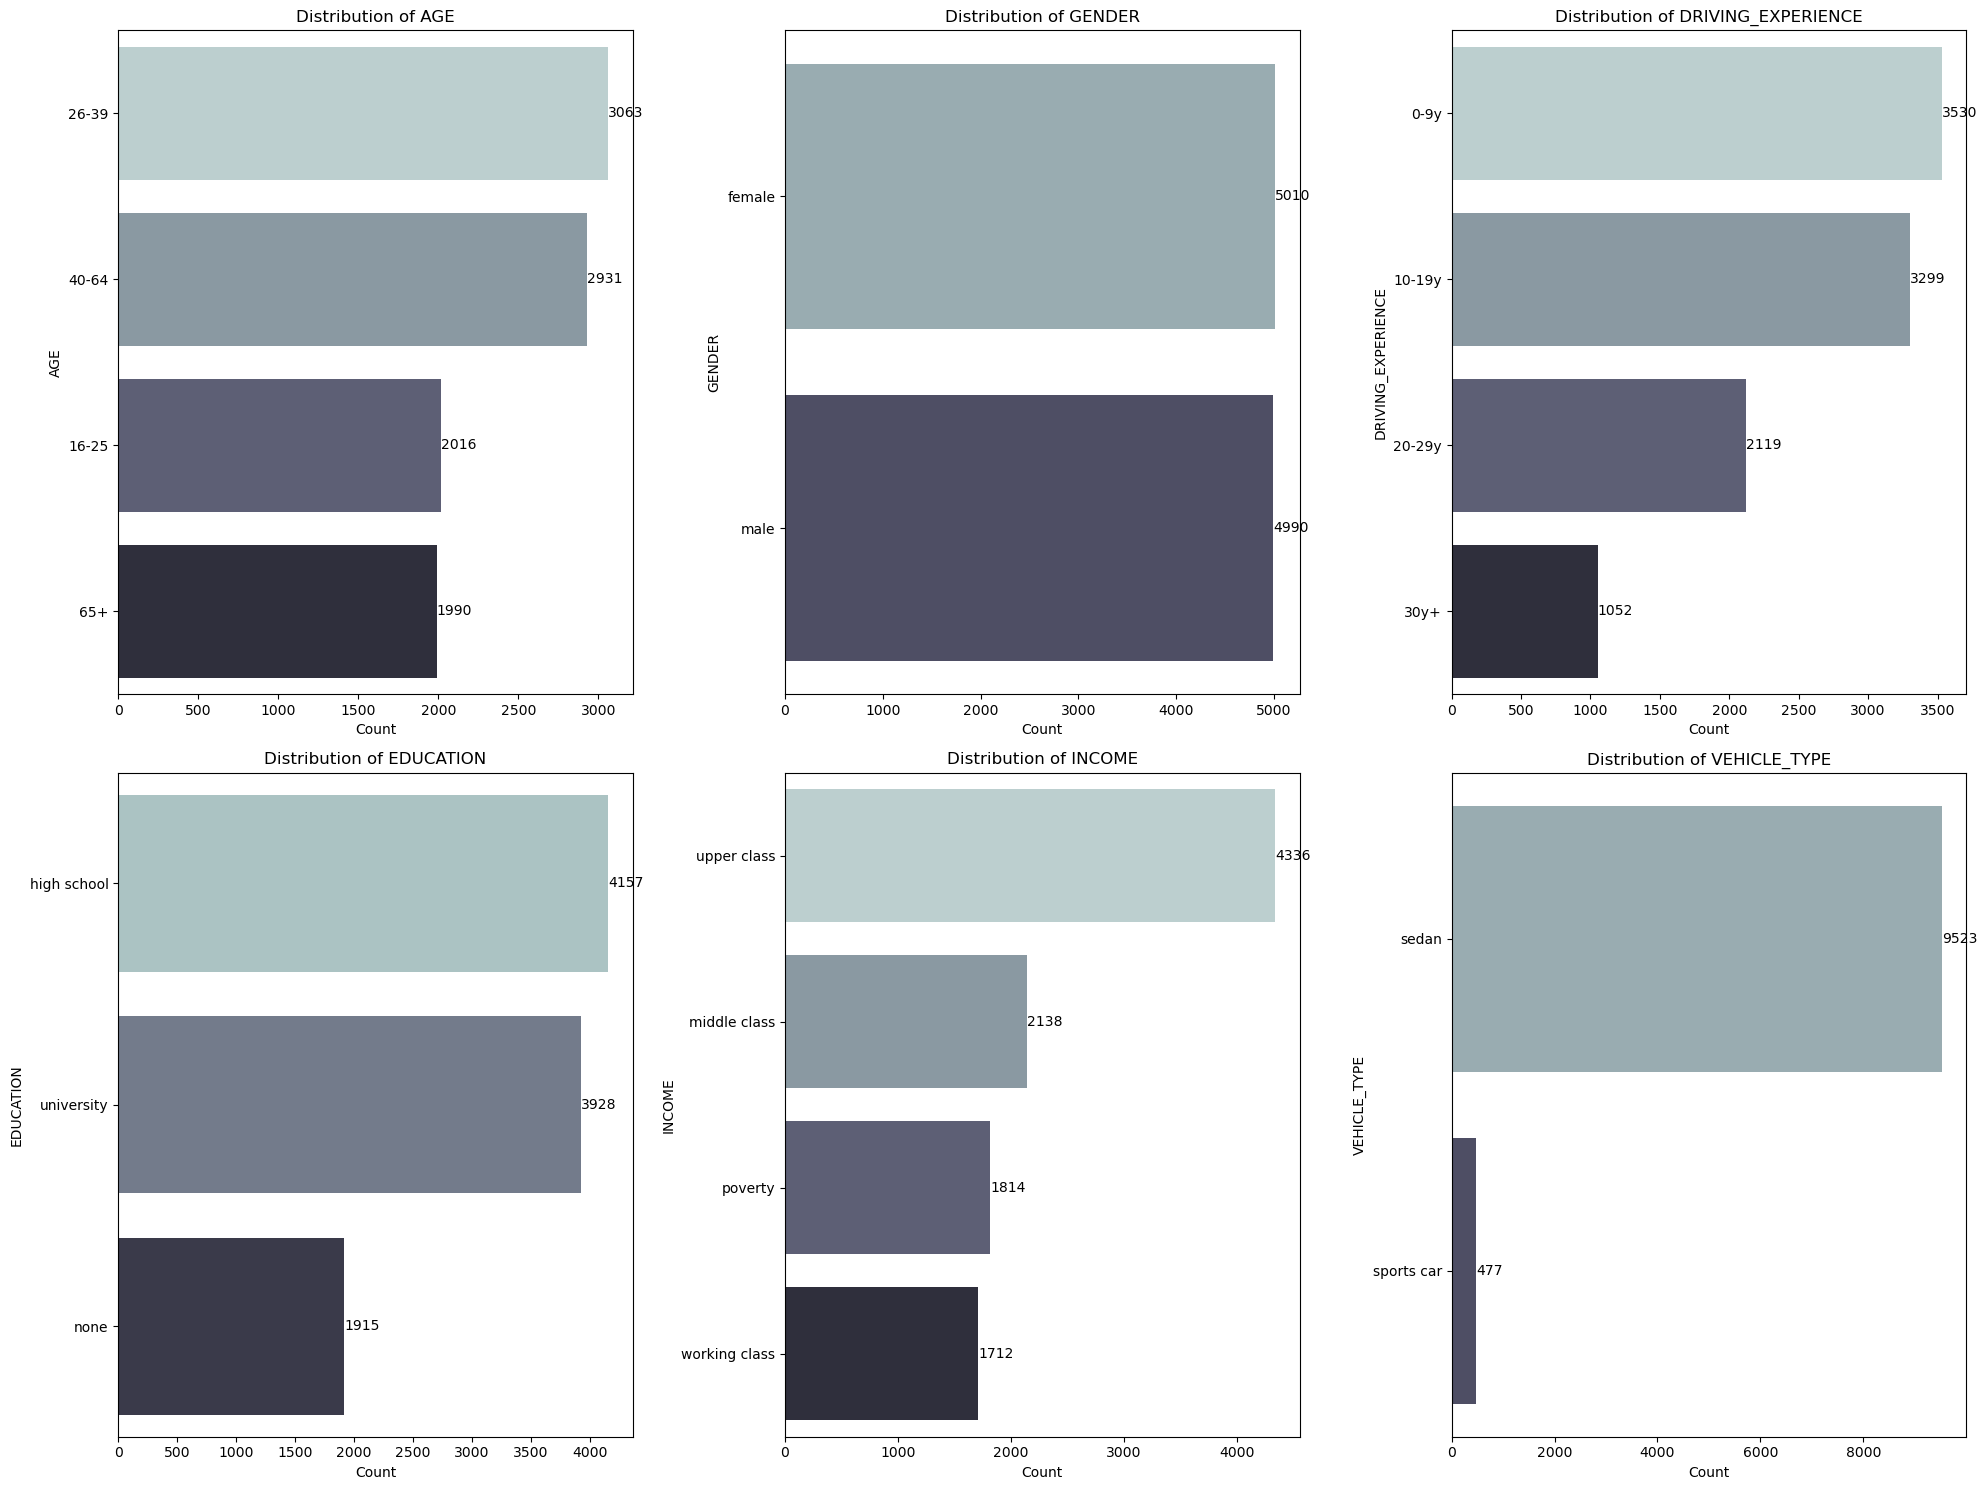

In [13]:
# Horizontal bar plot for categorical columns
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Categorical columns for visualization
categ_cols = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_TYPE']

# Plot for categorical columns
for i, col in enumerate(categ_cols, 1):
    plt.subplot(2, 3, i)
    fig=sns.countplot(data=carinsur_df, y=col, order=carinsur_df[col].value_counts().index, palette='bone_r')
    for j in fig.containers:
        fig.bar_label(j,rotation =0)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Bar Plot for OUTCOME')

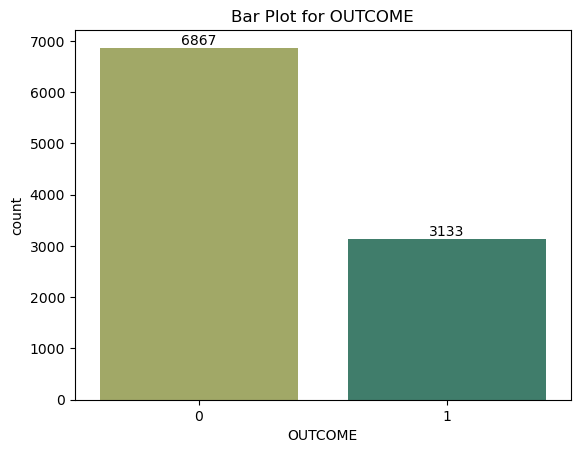

In [14]:
#bar plot for outcome variable

ae=sns.countplot(x='OUTCOME', data=carinsur_df, palette= 'gist_earth_r')
for i in ae.containers:
    ae.bar_label(i,)
ae.set_title("Bar Plot for OUTCOME")

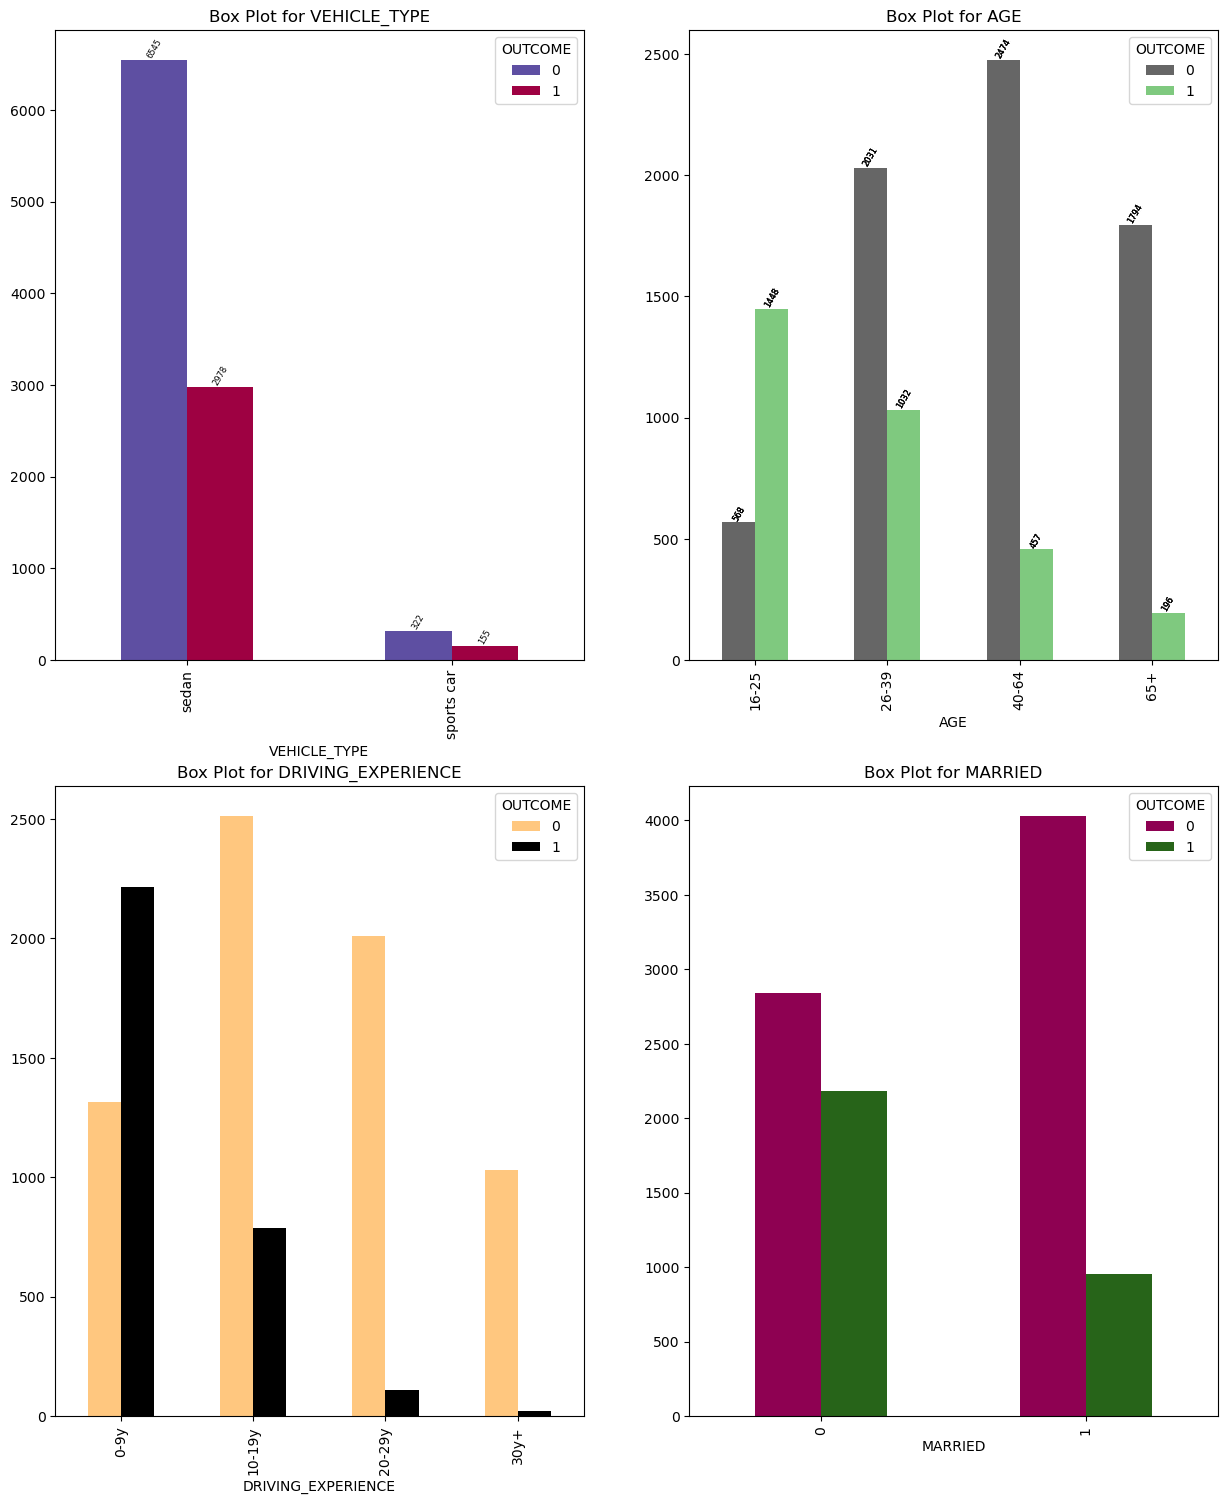

In [15]:
#box plot for VEHICLE_TYPE, AGE, DRIVING_EXPERIENCE and MARRIED in terms of outcome target attribute
fig, axes = plt.subplots(2, 2,figsize=(15,18))
ab=pd.crosstab(index= carinsur_df['VEHICLE_TYPE'] , columns=carinsur_df['OUTCOME']).plot(kind="bar", ax=axes[0,0],cmap="Spectral_r")
axes[0,0].set_title("Box Plot for VEHICLE_TYPE")
for j in ab.containers:
        ab.bar_label(j,rotation =60,size=6)
        
ac = pd.crosstab(index= carinsur_df['AGE'] , columns=carinsur_df['OUTCOME']).plot(kind="bar",ax=axes[0,1],cmap='Accent_r')
axes[0,1].set_title("Box Plot for AGE")
for j in ac.containers:
        ac.bar_label(j,rotation =60,size=6)
        
ad = pd.crosstab(index= carinsur_df['DRIVING_EXPERIENCE'] , columns=carinsur_df['OUTCOME']).plot(kind="bar",ax=axes[1,0], cmap='copper_r')
axes[1,0].set_title("Box Plot for DRIVING_EXPERIENCE")
for j in ac.containers:
        ac.bar_label(j,rotation =60,size=6)
        
ae = pd.crosstab(index= carinsur_df['MARRIED'] , columns=carinsur_df['OUTCOME']).plot(kind="bar",ax=axes[1,1], cmap='PiYG')
axes[1,1].set_title("Box Plot for MARRIED")
for j in ac.containers:
        ac.bar_label(j,rotation =60,size=6)

In [16]:
#tranforming the object types to numerical
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

#['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_TYPE']
label12=le.fit_transform(carinsur_df['AGE'])
carinsur_df.drop('AGE',axis=1)
carinsur_df['AGE']=label12

label13=le.fit_transform(carinsur_df['GENDER'])
carinsur_df.drop('GENDER',axis=1)
carinsur_df['GENDER']=label13

label14=le.fit_transform(carinsur_df['EDUCATION'])
carinsur_df.drop('EDUCATION',axis=1)
carinsur_df['EDUCATION']=label14

label15=le.fit_transform(carinsur_df['DRIVING_EXPERIENCE'])
carinsur_df.drop('DRIVING_EXPERIENCE',axis=1)
carinsur_df['DRIVING_EXPERIENCE']=label15

label16=le.fit_transform(carinsur_df['INCOME'])
carinsur_df.drop('INCOME',axis=1)
carinsur_df['INCOME']=label16

label17=le.fit_transform(carinsur_df['VEHICLE_TYPE'])
carinsur_df.drop('VEHICLE_TYPE',axis=1)
carinsur_df['VEHICLE_TYPE']=label17


OUTCOME                1.00
ANNUAL_MILEAGE         0.18
GENDER                 0.11
POSTAL_CODE            0.11
VEHICLE_TYPE           0.01
ID                    -0.01
INCOME                -0.05
EDUCATION             -0.09
DUIS                  -0.19
CHILDREN              -0.23
MARRIED               -0.26
SPEEDING_VIOLATIONS   -0.29
CREDIT_SCORE          -0.31
PAST_ACCIDENTS        -0.31
VEHICLE_OWNERSHIP     -0.38
AGE                   -0.45
DRIVING_EXPERIENCE    -0.50
Name: OUTCOME, dtype: float64


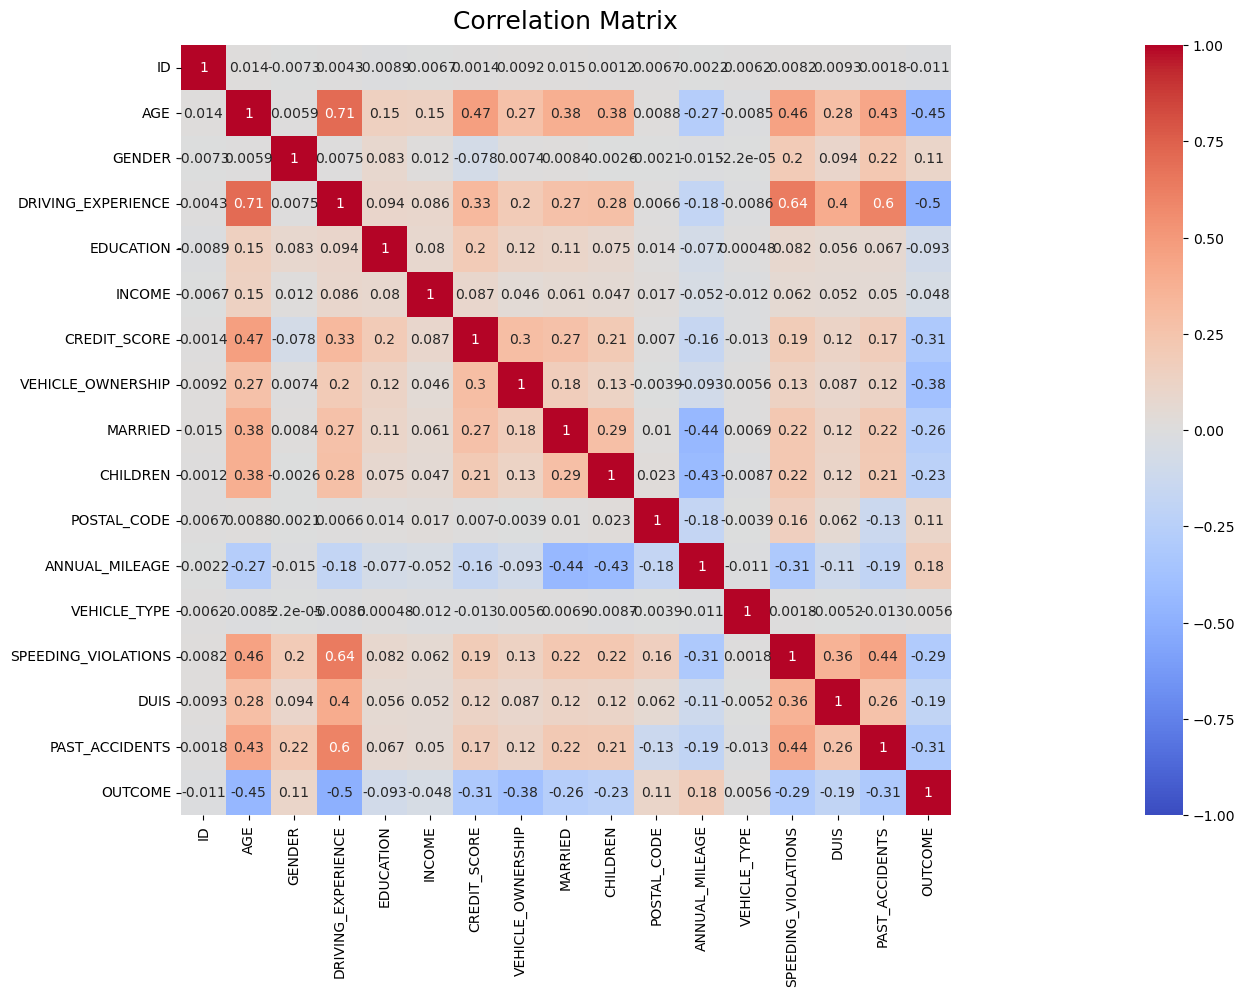

In [17]:
#correlation matrix

carinsur_corr = carinsur_df.corr()

pl=carinsur_corr['OUTCOME'].sort_values(ascending=False)
print(round(pl,2))

f, ax = plt.subplots(figsize=(50, 10))
corr_map=sns.heatmap(carinsur_corr, square=True, vmin=-1, vmax=1, annot=True,cmap="coolwarm");
corr_map.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12);

<b style="font-size:15px">2. Build a logistic regression model and discuss the significant variables. Provide a table of all significant variables and their coefficients (a snippet of the data is not acceptable and if there are no variables at .05 or under, feel free to expand to .1). From your initial thoughts, which variable sticks out to you as intriguing that it is significant and why. How could this information be useful to the insurer?</b>

In [37]:
#logistic regression model building
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Split data into training and test sets
X = carinsur_df.drop(['ID', 'OUTCOME'], axis=1)
y = carinsur_df['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the model (needed for the statsmodels regression model)

logit_model = sm.Logit(y_train, sm.add_constant(X_train))

# Fit logistic regression model using statsmodels
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.383190
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                OUTCOME   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6984
Method:                           MLE   Df Model:                           15
Date:                Sat, 28 Oct 2023   Pseudo R-squ.:                  0.3840
Time:                        15:41:48   Log-Likelihood:                -2682.3
converged:                       True   LL-Null:                       -4354.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6026      0.278      2.169      0.030       0.058       1.147
AG

In [38]:
# Extract summary and convert it to a DataFrame for easier manipulation
summary_df = pd.DataFrame(result.summary2().tables[1])

# Filter significant variables based on p-value <= 0.05
sig_vars_05 = summary_df[summary_df['P>|z|'] <= 0.05]

# If none found with p-value <= 0.05, expand to p-value <= 0.1
if sig_vars_05.shape[0] == 0:
    sig_vars = summary_df[summary_df['P>|z|'] <= 0.10]
else:
    sig_vars = sig_vars_05

sig_vars

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.602554,0.277855,2.168593,3.011359e-02,0.057969,1.147139
AGE,-0.112011,0.047986,-2.334230,1.958367e-02,-0.206061,-0.017960
GENDER,0.871828,0.072999,11.942975,7.065003e-33,0.728752,1.014904
DRIVING_EXPERIENCE,-1.603318,0.084590,-18.954036,4.089824e-80,-1.769111,-1.437525
CREDIT_SCORE,-1.107379,0.300864,-3.680660,2.326310e-04,-1.697062,-0.517696
VEHICLE_OWNERSHIP,-1.679753,0.074768,-22.466117,8.904483e-112,-1.826296,-1.533210
MARRIED,-0.402117,0.079630,-5.049821,4.422249e-07,-0.558189,-0.246045
POSTAL_CODE,0.000031,0.000002,12.514404,6.227350e-36,0.000026,0.000036
ANNUAL_MILEAGE,0.000073,0.000016,4.435567,9.183047e-06,0.000040,0.000105
PAST_ACCIDENTS,-0.129645,0.042427,-3.055717,2.245228e-03,-0.212801,-0.046490


In [39]:
from sklearn.metrics import accuracy_score, precision_score

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Accuracy score calculation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score =", round(accuracy,2)) 

# Precision score calculation
precision = precision_score(y_test, y_pred)
print("Precision Score =", round(precision,2)) 

# classification report generation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))



Accuracy Score = 0.8
Precision Score = 0.7
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2063
           1       0.70      0.62      0.66       937

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000




True Positive = 1813
False Positive = 250
False Negative = 354
True Negative = 583


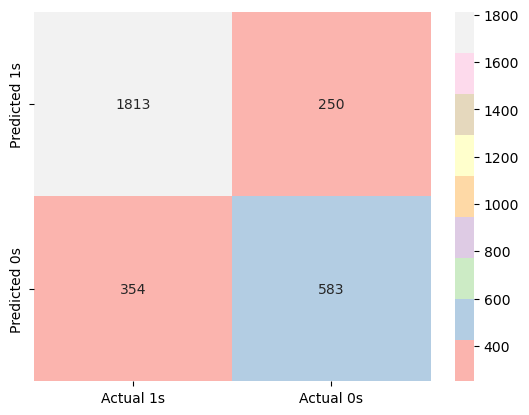

In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

model_confusion_matrix=confusion_matrix(y_test,y_pred)  


X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(model_confusion_matrix,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)

print ('\nTrue Positive =' , model_confusion_matrix [0][0])
print (  'False Positive =' , model_confusion_matrix [0][1])
print (  'False Negative =' , model_confusion_matrix [1][0])
print (  'True Negative =' , model_confusion_matrix [1][1])


The ROC score is:  0.75


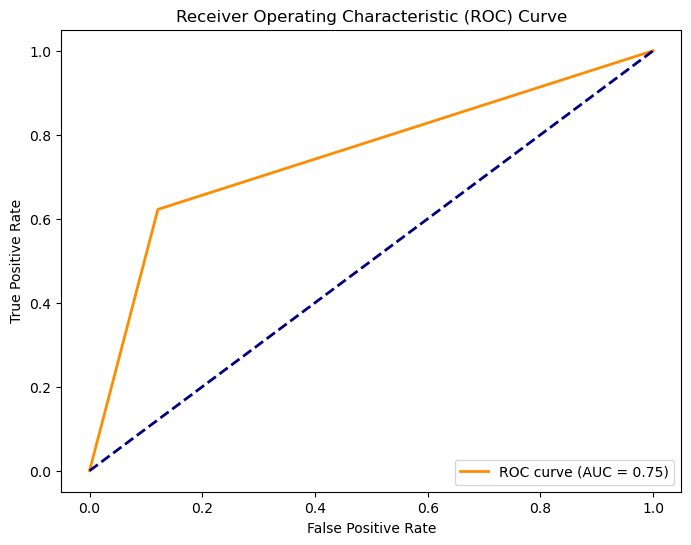

In [22]:
#ROC score and ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("The ROC score is: ",round(roc_auc_score(y_test,y_pred),2))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,color='darkorange',lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<b style="font-size:15px">3. Run a few non-ensemble models (only ones used in class) using (1000 iterations). Address the accuracy of each model and why you choose that model. Which model is the most accurate?</b></br>

<b style="font-size:15px">4. Build a confusion matrix for each model; discuss which part of the confusion matrix a company would want to reduce and which model does the best at doing so.</b>

<b style="font-size:15px">KNN Model</b>

Accuracy KNN Model : 0.8
Precision Score = 0.73
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2063
           1       0.73      0.58      0.65       937

    accuracy                           0.80      3000
   macro avg       0.78      0.74      0.75      3000
weighted avg       0.80      0.80      0.80      3000

Confusion Matrix:
[[1861  202]
 [ 392  545]]


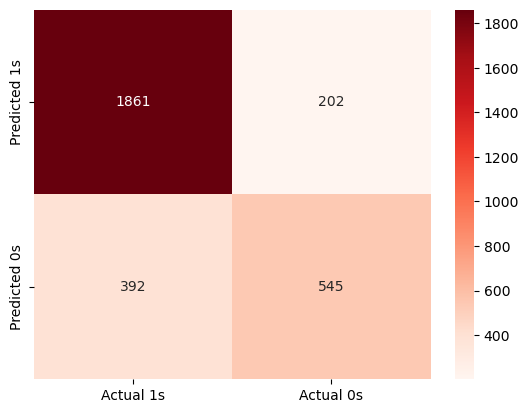

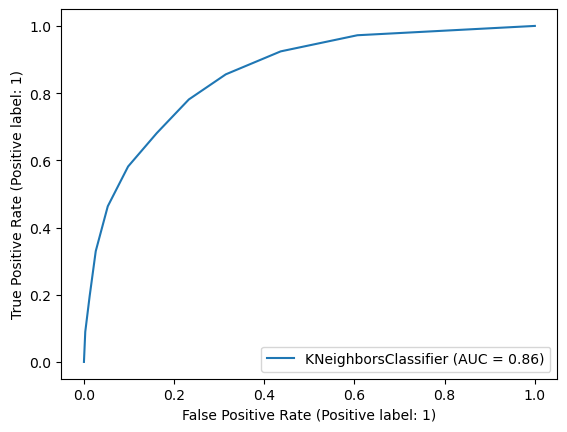

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Building the  KNN model for k = 10
knn_cl = KNeighborsClassifier(n_neighbors=10)
knn_cl.fit(X_train, y_train)

# Evaluate the model on the testing set
Accuracy = knn_cl.score(X_test, y_test)
print("Accuracy KNN Model :", round(Accuracy,2))

y_pred = knn_cl.predict(X_test)

# Precision score calculation
precision = precision_score(y_test, y_pred)
print("Precision Score =", round(precision,2)) 

# classification report generation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Building the confusion matrix for k=10
from sklearn.metrics import confusion_matrix

matrix_knn= confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n{matrix_knn}")

X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']         

sns.heatmap(matrix_knn,annot=True, fmt = 'g',cmap='Reds', xticklabels= X_label,yticklabels=Y_labels)

#ROC curve for k =10
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(knn_cl, X_test, y_test)

<b style="font-size:15px">Random Forest Model</b>

Accuracy Random Forest =  0.82
Precision Score = 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2063
           1       0.73      0.65      0.69       937

    accuracy                           0.82      3000
   macro avg       0.79      0.77      0.78      3000
weighted avg       0.81      0.82      0.81      3000

Confusion Matrix:
[[1838  225]
 [ 324  613]]


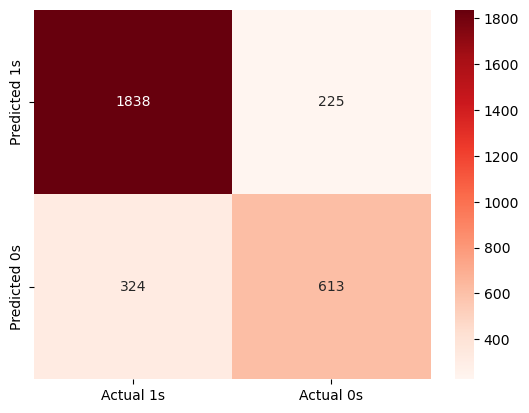

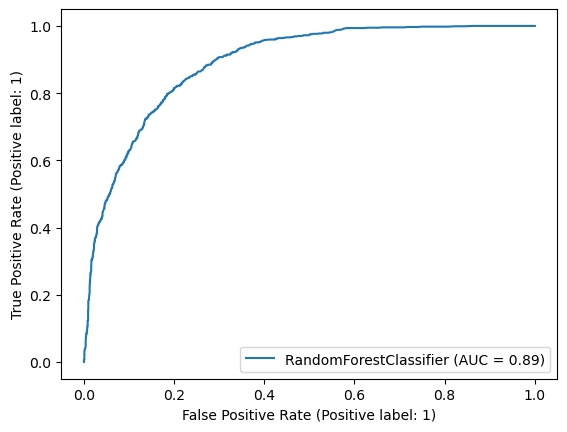

In [24]:
#random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier(n_estimators=1000, random_state=42)
rfclass.fit(X_train, y_train)
rfypred = rfclass.predict(X_test)

#accuracy
print("Accuracy Random Forest = ", round(rfclass.score(X_test, y_test),2))

#precision
precision = precision_score(y_test, rfypred)
print("Precision Score =", round(precision,2)) 

#classification report
classification_report_str1 = classification_report(y_test, rfypred)
print("Classification Report:\n", classification_report_str1)

#confusion Matrix
matrix_rf = confusion_matrix(y_test, rfypred)
print(f"Confusion Matrix:\n{matrix_rf}")

X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']       

sns.heatmap(matrix_rf,annot=True, fmt = 'g',cmap='Reds', xticklabels= X_label,yticklabels=Y_labels)

#roc plot and curve
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(rfclass, X_test, y_test)


<b style="font-size:15px">Gradient Boost Model</b>

Accuracy GradientBoosting =  0.82
Precision Score = 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      2063
           1       0.73      0.70      0.71       937

    accuracy                           0.82      3000
   macro avg       0.80      0.79      0.79      3000
weighted avg       0.82      0.82      0.82      3000

Confusion Matrix:
[[1815  248]
 [ 280  657]]


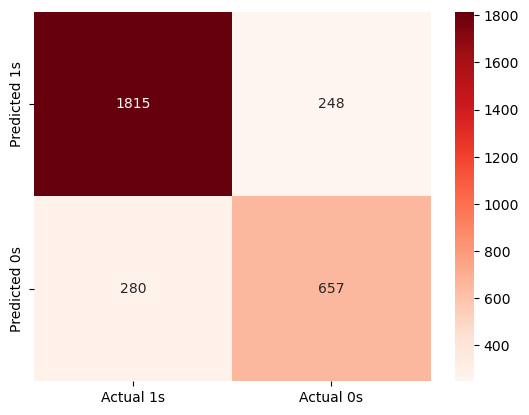

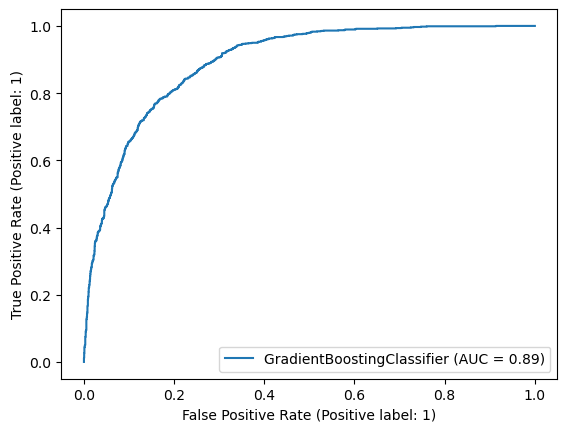

In [25]:
#GradientBoosting classifier model
from sklearn.ensemble import GradientBoostingClassifier

gbclass = GradientBoostingClassifier(n_estimators=1000, random_state=42)
gbclass.fit(X_train,y_train)
gbypred = gbclass.predict(X_test)

#Accuracy
print("Accuracy GradientBoosting = ", round(gbclass.score(X_test,y_test),2))

#Precision
precision = precision_score(y_test, gbypred)
print("Precision Score =", round(precision,2)) 

#classification report
classification_report_str2 = classification_report(y_test, gbypred)
print("Classification Report:\n", classification_report_str2)

#Confusion Matrix
matrix_gb = confusion_matrix(y_test, gbypred)
print(f"Confusion Matrix:\n{matrix_gb}")

X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']       

sns.heatmap(matrix_gb,annot=True, fmt = 'g',cmap='Reds', xticklabels= X_label,yticklabels=Y_labels)

#roc plot and curve
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(gbclass, X_test, y_test)


<b style="font-size:15px">Decision Tree Model</b>

Decision Tree Model Accuracy: 0.82
Precision Score = 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2063
           1       0.71      0.72      0.72       937

    accuracy                           0.82      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.82      0.82      0.82      3000

Confusion Matrix:
[[1793  270]
 [ 263  674]]


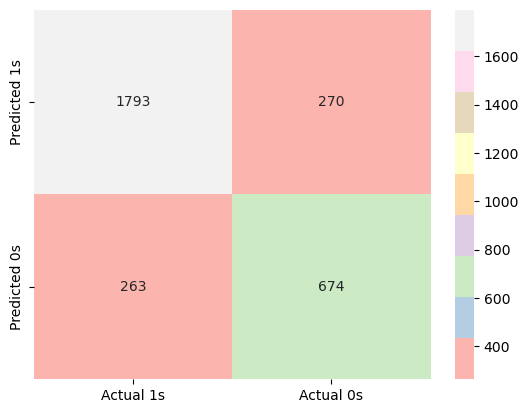

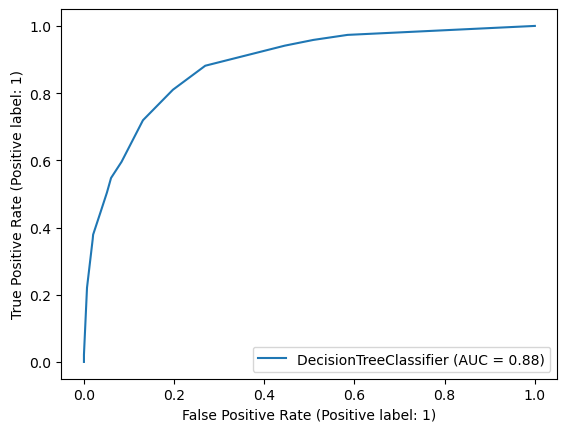

In [26]:
# Fit a Decision Tree model with at most 4 branches
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
ytree_pred = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy = accuracy_score(y_test, ytree_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, ytree_pred)
print("Precision Score =", round(precision,2)) 

#classification report
classification_report_str = classification_report(y_test, ytree_pred)
print("Classification Report:\n", classification_report_str)

#confusion matrix
matrix_dt = confusion_matrix(y_test, ytree_pred)
print(f"Confusion Matrix:\n{matrix_dt}")

X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(matrix_dt,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)


#roc plot and curve
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(tree_model, X_test, y_test)


<b style="font-size:15px">Neural Network Model</b>

Neural Network Accuracy score 1 =  0.69
Precision Score = 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81      2063
           1       0.00      0.00      0.00       937

    accuracy                           0.69      3000
   macro avg       0.34      0.50      0.41      3000
weighted avg       0.47      0.69      0.56      3000

Confusion Matrix:
[[2063    0]
 [ 937    0]]


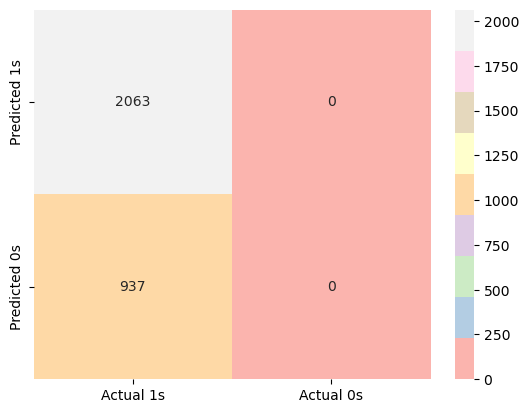

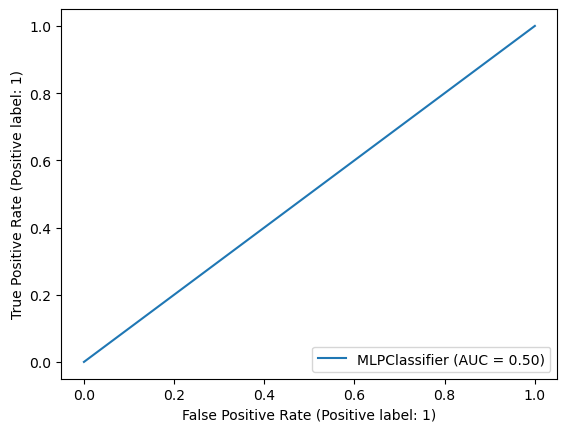

In [27]:
from sklearn.neural_network import MLPClassifier

#Initializing multilayer perception

mlp = MLPClassifier(3, solver='sgd',learning_rate_init=0.01,max_iter=1000)
mlp.fit(X_train, y_train)
nnpred=mlp.predict(X_test)

#Accuracy report
print("Neural Network Accuracy score 1 = ", round(mlp.score(X_test,y_test),2))

#precision
precision = precision_score(y_test, nnpred)
print("Precision Score =", round(precision,2)) 

#classification report
classification_report_str3 = classification_report(y_test, nnpred)
print("Classification Report:\n", classification_report_str3)

matrix_nn1= confusion_matrix(y_test, nnpred)
print(f"Confusion Matrix:\n{matrix_nn1}")

X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(matrix_nn1,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)


#roc plot and curve
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(mlp, X_test, y_test)


Training set Accuracy: 0.8488571643829346
Test set Accuracy: 0.8103333115577698
94/94 [==============================] - 0s 504us/step
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      2063
           1       0.78      0.55      0.64       937

    accuracy                           0.81      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.81      0.81      0.80      3000

Confusion Matrix:
[[1916  147]
 [ 422  515]]


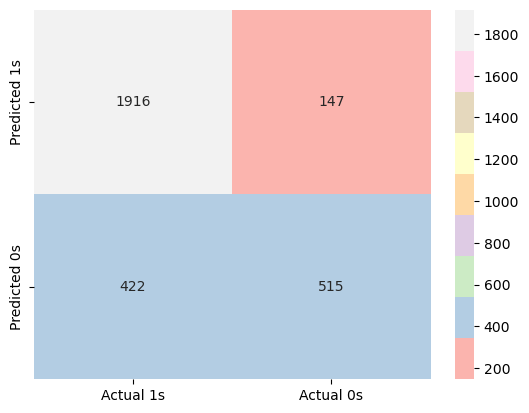

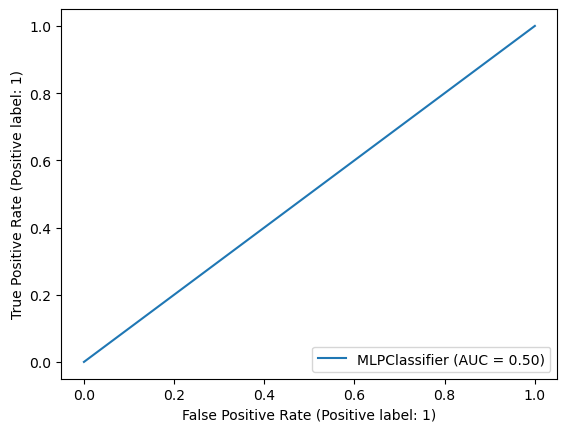

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Data Preparation: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Design
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Model Compilation
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=0)

# Evaluation
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print("Training set Accuracy:",train_accuracy)
print("Test set Accuracy:", test_accuracy)

# Predict classes
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report \n", class_report)

# Confusion matrix
matrix_nn2 = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{matrix_nn2}")

X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(matrix_nn2,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)

#roc plot and curve
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(mlp, X_test, y_pred)


<b style="font-size:15px">Linear Regression Model</b>

In [29]:
#building the model and generating the OLS regression results
X2=sm.add_constant(X_train)
est=sm.OLS(y_train,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                OUTCOME   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     277.7
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:11:00   Log-Likelihood:                -2920.5
No. Observations:                7000   AIC:                             5873.
Df Residuals:                    6984   BIC:                             5983.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6185    

Accuracy Score = 0.82
Precision Score = 0.73
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2063
           1       0.73      0.64      0.68       937

    accuracy                           0.81      3000
   macro avg       0.79      0.77      0.78      3000
weighted avg       0.81      0.81      0.81      3000



<AxesSubplot:>

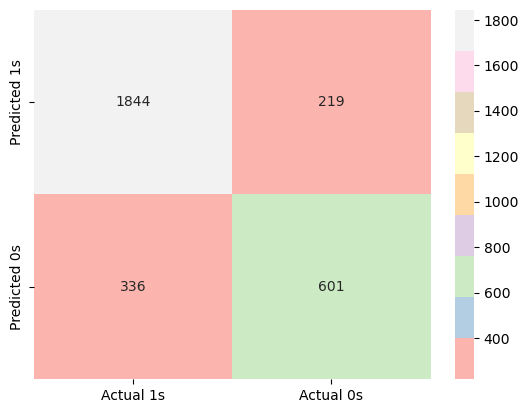

In [35]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LinearRegression

modellin = LinearRegression()
modellin.fit(X_train_scaled, y_train)

# Evaluate the model
ylin_pred_cont = modellin.predict(X_test_scaled)

ylin_pred_binary = (ylin_pred_cont > 0.5).astype("int32")

# Accuracy score calculation
accuracy = accuracy_score(y_test, ylin_pred_binary)
print("Accuracy Score =", round(accuracy,2)) 

# Precision score calculation
precision = precision_score(y_test, ylin_pred_binary)
print("Precision Score =", round(precision,2)) 

# classification report generation
from sklearn.metrics import classification_report
print(classification_report(y_test,ylin_pred_binary))

#confusion matrix
matrix_linear = confusion_matrix(y_test,ylin_pred_binary)  


X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(matrix_linear,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)


<b style="font-size:15px">Forwards/Backwards Selection Model</b>

In [30]:
import statsmodels.api as sm

# Initialize an empty list for selected features
selected_features = []
min_aic = float("inf")

# Performing forward selection
for features in X.columns:
    modl = sm.OLS(y, sm.add_constant(carinsur_df[selected_features + [features]]))
    res = modl.fit()
    curr_aic = res.aic
    if curr_aic < min_aic:
        min_aic = curr_aic
        selected_features.append(features)

# Print the selected features and their AIC
print("Selected Features (Forward Selection):", selected_features)

print("Minimum AIC:", round(min_aic,2))

Selected Features (Forward Selection): ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'PAST_ACCIDENTS']
Minimum AIC: 8379.04


In [31]:
# Initialize all features
all_features = list(X.columns)

# Performing backward selection
while len(all_features) > 0:
    models = []
    for features in all_features:
        model = sm.OLS(y, sm.add_constant(carinsur_df[selected_features + [features]]))
        result = model.fit()
        models.append((result.aic, features))
    models.sort()
    best_aic, best_feature = models[0]
    if best_aic < min_aic:
        min_aic = best_aic
        selected_features.append(best_feature)
    else:
        break
    all_features.remove(best_feature)

# Print the selected features and their AIC
print("Selected Features (Backward Selection):", selected_features)
print("Minimum AIC:", round(min_aic,2))

Selected Features (Backward Selection): ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'PAST_ACCIDENTS']
Minimum AIC: 8379.04


<b style="font-size:15px">SVM Model</b>

SVM Model Accuracy: 0.75
Precision Score = 0.5726937269372694
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      2063
           1       0.57      0.83      0.68       937

    accuracy                           0.75      3000
   macro avg       0.74      0.77      0.74      3000
weighted avg       0.80      0.75      0.76      3000

Confusion Matrix:
[[1484  579]
 [ 161  776]]


<AxesSubplot:>

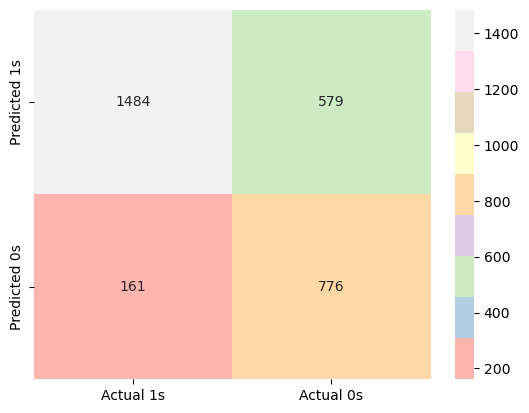

In [32]:
from sklearn.svm import SVC

# Train an SVM model with 1000 iterations
svm = SVC(max_iter=1000, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict on the test set
ysvm_pred = svm.predict(X_test_scaled)

#Accuracy
acc = accuracy_score(y_test, ysvm_pred)
print(f"SVM Model Accuracy: {acc:.2f}")

#precision
precision = precision_score(y_test, ysvm_pred)
print("Precision Score =", precision )

# Classification report and Confusion matrix
class_report_svm = classification_report(y_test, ysvm_pred)
print("Classification report: \n", class_report_svm)


conf_matrix_svm = confusion_matrix(y_test, ysvm_pred)
print(f"Confusion Matrix:\n{conf_matrix_svm}")

X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(conf_matrix_svm,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)
